## 1. Importing libraries and reading the data

In [70]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
plt.style.use('seaborn-whitegrid')
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
plt.rc('animation', html='html5')
sns.set_style("darkgrid")
sns.set(rc={'axes.facecolor':'lightsteelblue', 'figure.facecolor':'lavender'})

In [3]:
df = pd.read_csv('CSV files/spider_species.csv')

In [4]:
df.shape

(49738, 10)

In [5]:
df.head()

,speciesId,species_lsid,family,genus,species,subspecies,author,year,parentheses,distribution
0,1,urn:lsid:nmbe.ch:spidersp:000896,Actinopodidae,Actinopus,caraiba,NaN,Simon,1889,1,Venezuela
1,2,urn:lsid:nmbe.ch:spidersp:000898,Actinopodidae,Actinopus,crassipes,NaN,Keyserling,1891,1,"Brazil, Paraguay, Argentina"
2,3,urn:lsid:nmbe.ch:spidersp:000899,Actinopodidae,Actinopus,cucutaensis,NaN,Mello-Leitão,1941,0,"Colombia, Venezuela, Brazil"
3,4,urn:lsid:nmbe.ch:spidersp:000900,Actinopodidae,Actinopus,dubiomaculatus,NaN,Mello-Leitão,1923,0,Brazil
4,5,urn:lsid:nmbe.ch:spidersp:000901,Actinopodidae,Actinopus,echinus,NaN,Mello-Leitão,1949,0,Brazil


## 2. Cleaning null rows and columns we don't need

In [6]:
df.drop(['speciesId', 'species_lsid', 'subspecies'], axis=1, inplace=True)

In [7]:
df.head()

,family,genus,species,author,year,parentheses,distribution
0,Actinopodidae,Actinopus,caraiba,Simon,1889,1,Venezuela
1,Actinopodidae,Actinopus,crassipes,Keyserling,1891,1,"Brazil, Paraguay, Argentina"
2,Actinopodidae,Actinopus,cucutaensis,Mello-Leitão,1941,0,"Colombia, Venezuela, Brazil"
3,Actinopodidae,Actinopus,dubiomaculatus,Mello-Leitão,1923,0,Brazil
4,Actinopodidae,Actinopus,echinus,Mello-Leitão,1949,0,Brazil


In [8]:
df.dtypes

family          object
genus           object
species         object
author          object
year             int64
parentheses      int64
distribution    object
dtype: object

In [9]:
df['year'] = df['year'].astype(object)

In [10]:
df['parentheses'] = df['parentheses'].astype(object)

In [11]:
df.dtypes

family          object
genus           object
species         object
author          object
year            object
parentheses     object
distribution    object
dtype: object

In [12]:
df.isnull().sum()

family          0
genus           0
species         0
author          0
year            0
parentheses     0
distribution    0
dtype: int64

### We have a clean dataset

## 3. Working on 'distribution' & 'author' column

In [13]:
list(df['distribution'])

['Venezuela',
 'Brazil, Paraguay, Argentina',
 'Colombia, Venezuela, Brazil',
 'Brazil',
 'Brazil',
 'Brazil',
 'Trinidad',
 'Uruguay, Argentina',
 'Uruguay',
 'Uruguay, Argentina',
 'Brazil',
 'Brazil',
 'Brazil',
 'South America',
 'Brazil',
 'Brazil',
 'Brazil',
 'Panama',
 'Venezuela',
 'Brazil',
 'Brazil',
 'Venezuela',
 'Brazil',
 'Brazil',
 'Venezuela',
 'Brazil',
 'South America',
 'Australia (New South Wales)',
 'Australia',
 'Australia (Western Australia)',
 'Australia (Western Australia)',
 'Australia (Western Australia)',
 'Australia',
 'Australia (Western Australia)',
 'Southern Australia',
 'Australia (Western Australia, Northern Territory)',
 'Australia (South Australia)',
 'Australia (Western Australia, South Australia, Victoria)',
 'Australia (Western Australia)',
 'Chile',
 'Chile',
 'Chile',
 'Thailand',
 'Thailand',
 'Western Mediterranean',
 'Uganda or DR Congo',
 'Morocco',
 'South Africa',
 'Japan',
 'India',
 'China',
 'Réunion',
 'Canary Is., Morocco, Algeria',

In [14]:
df.rename(columns = {'distribution' : 'Founded 1'}, inplace=True)

In [15]:
df.head()

,family,genus,species,author,year,parentheses,Founded 1
0,Actinopodidae,Actinopus,caraiba,Simon,1889,1,Venezuela
1,Actinopodidae,Actinopus,crassipes,Keyserling,1891,1,"Brazil, Paraguay, Argentina"
2,Actinopodidae,Actinopus,cucutaensis,Mello-Leitão,1941,0,"Colombia, Venezuela, Brazil"
3,Actinopodidae,Actinopus,dubiomaculatus,Mello-Leitão,1923,0,Brazil
4,Actinopodidae,Actinopus,echinus,Mello-Leitão,1949,0,Brazil


### Founded 1 column has multiple country name so we will separate them into different columns of Founded 2, Founded 3 and so on.....

In [16]:
places = df['Founded 1'].str.split(',', expand=True)

In [17]:
df_join = pd.concat([df, places], axis=1)

In [18]:
df_join.head()

,family,genus,species,author,year,parentheses,Founded 1,0,1,2,...,5,6,7,8,9,10,11,12,13,14
0,Actinopodidae,Actinopus,caraiba,Simon,1889,1,Venezuela,Venezuela,None,None,...,None,None,None,None,None,None,None,None,None,None
1,Actinopodidae,Actinopus,crassipes,Keyserling,1891,1,"Brazil, Paraguay, Argentina",Brazil,Paraguay,Argentina,...,None,None,None,None,None,None,None,None,None,None
2,Actinopodidae,Actinopus,cucutaensis,Mello-Leitão,1941,0,"Colombia, Venezuela, Brazil",Colombia,Venezuela,Brazil,...,None,None,None,None,None,None,None,None,None,None
3,Actinopodidae,Actinopus,dubiomaculatus,Mello-Leitão,1923,0,Brazil,Brazil,None,None,...,None,None,None,None,None,None,None,None,None,None
4,Actinopodidae,Actinopus,echinus,Mello-Leitão,1949,0,Brazil,Brazil,None,None,...,None,None,None,None,None,None,None,None,None,None


In [19]:
df_join.rename(columns = {0 : 'Founded 2'}, inplace=True)

In [20]:
df_join.rename(columns = {1 : 'Founded 3', 2 : 'Founded 4', 3 : 'Founded 5', 4 : 'Founded 6', 5 : 'Founded 7',
                         6 : 'Founded 8', 7 : 'Founded 9', 8 : 'Founded 10', 9 : 'Founded 11', 10 : 'Founded 12',
                         11 : 'Founded 13', 12 : 'Founded 14', 13 : 'Founded 15', 14 : 'Founded 16'}, inplace=True)

In [21]:
df_join.head()

,family,genus,species,author,year,parentheses,Founded 1,Founded 2,Founded 3,Founded 4,...,Founded 7,Founded 8,Founded 9,Founded 10,Founded 11,Founded 12,Founded 13,Founded 14,Founded 15,Founded 16
0,Actinopodidae,Actinopus,caraiba,Simon,1889,1,Venezuela,Venezuela,None,None,...,None,None,None,None,None,None,None,None,None,None
1,Actinopodidae,Actinopus,crassipes,Keyserling,1891,1,"Brazil, Paraguay, Argentina",Brazil,Paraguay,Argentina,...,None,None,None,None,None,None,None,None,None,None
2,Actinopodidae,Actinopus,cucutaensis,Mello-Leitão,1941,0,"Colombia, Venezuela, Brazil",Colombia,Venezuela,Brazil,...,None,None,None,None,None,None,None,None,None,None
3,Actinopodidae,Actinopus,dubiomaculatus,Mello-Leitão,1923,0,Brazil,Brazil,None,None,...,None,None,None,None,None,None,None,None,None,None
4,Actinopodidae,Actinopus,echinus,Mello-Leitão,1949,0,Brazil,Brazil,None,None,...,None,None,None,None,None,None,None,None,None,None


In [22]:
df_join.tail()

,family,genus,species,author,year,parentheses,Founded 1,Founded 2,Founded 3,Founded 4,...,Founded 7,Founded 8,Founded 9,Founded 10,Founded 11,Founded 12,Founded 13,Founded 14,Founded 15,Founded 16
49733,Salticidae,Rhenefictus,tropicus,Logunov,2021,0,Vietnam,Vietnam,None,None,...,None,None,None,None,None,None,None,None,None,None
49734,Salticidae,Thiania,zabkai,Logunov,2021,0,Vietnam,Vietnam,None,None,...,None,None,None,None,None,None,None,None,None,None
49735,Salticidae,Toxeus,yamasakii,Logunov,2021,0,Vietnam,Vietnam,None,None,...,None,None,None,None,None,None,None,None,None,None
49736,Thomisidae,Xysticus,logunovorum,Blick & Ono,2021,0,Iran,Iran,None,None,...,None,None,None,None,None,None,None,None,None,None
49737,Salticidae,Titanattus,sciosciae,"Rubio, Baigorria & Stolar",2021,0,Argentina,Argentina,None,None,...,None,None,None,None,None,None,None,None,None,None


## .................................................................................................................................................

In [23]:
df_join['author'].to_list()

['Simon',
 'Keyserling',
 'Mello-Leitão',
 'Mello-Leitão',
 'Mello-Leitão',
 'Mello-Leitão',
 'Pocock',
 'Holmberg',
 'Ausserer',
 'C. L. Koch',
 'Doleschall',
 'Lucas',
 'Mello-Leitão',
 'Lucas',
 'Ausserer',
 'Chamberlin',
 'Mello-Leitão',
 'O. Pickard-Cambridge',
 'Simon',
 'Mello-Leitão',
 'Lucas',
 'Simon',
 'Perty',
 'Mello-Leitão',
 'Simon',
 'F. O. Pickard-Cambridge',
 'Chamberlin',
 'Rainbow',
 'Faulder',
 'Harms & Framenau',
 'O. Pickard-Cambridge',
 'Womersley',
 'O. Pickard-Cambridge',
 'Harms & Framenau',
 'Walckenaer',
 'Levitt-Gregg',
 'Rainbow & Pulleine',
 'Faulder',
 'Main',
 'Goloboff',
 'Zapfe',
 'Goloboff',
 'Dankittipakul & Zhang',
 'Dankittipakul & Zhang',
 'Walckenaer',
 'Strand',
 'Fage',
 'Simon',
 'Tanikawa',
 'Tikader',
 'Wang',
 'Vinson',
 'Lucas',
 'Zhang, Zhu & Song',
 'Paik',
 'Denis',
 'Zhang, Zhu & Song',
 'Hogg',
 'Strand',
 'Caporiacco',
 'Simon',
 'Roewer',
 'Tikader',
 'Wunderlich',
 'Schmidt',
 'Caporiacco',
 'Benoit',
 'Caporiacco',
 'Simon',
 'F

In [24]:
df_join[['author 1', 'author 2']] = df['author'].str.split(',', 1, expand=True) 

In [25]:
df_join.head()

,family,genus,species,author,year,parentheses,Founded 1,Founded 2,Founded 3,Founded 4,...,Founded 9,Founded 10,Founded 11,Founded 12,Founded 13,Founded 14,Founded 15,Founded 16,author 1,author 2
0,Actinopodidae,Actinopus,caraiba,Simon,1889,1,Venezuela,Venezuela,None,None,...,None,None,None,None,None,None,None,None,Simon,None
1,Actinopodidae,Actinopus,crassipes,Keyserling,1891,1,"Brazil, Paraguay, Argentina",Brazil,Paraguay,Argentina,...,None,None,None,None,None,None,None,None,Keyserling,None
2,Actinopodidae,Actinopus,cucutaensis,Mello-Leitão,1941,0,"Colombia, Venezuela, Brazil",Colombia,Venezuela,Brazil,...,None,None,None,None,None,None,None,None,Mello-Leitão,None
3,Actinopodidae,Actinopus,dubiomaculatus,Mello-Leitão,1923,0,Brazil,Brazil,None,None,...,None,None,None,None,None,None,None,None,Mello-Leitão,None
4,Actinopodidae,Actinopus,echinus,Mello-Leitão,1949,0,Brazil,Brazil,None,None,...,None,None,None,None,None,None,None,None,Mello-Leitão,None


In [26]:
df_join['author 1'].to_list()

['Simon',
 'Keyserling',
 'Mello-Leitão',
 'Mello-Leitão',
 'Mello-Leitão',
 'Mello-Leitão',
 'Pocock',
 'Holmberg',
 'Ausserer',
 'C. L. Koch',
 'Doleschall',
 'Lucas',
 'Mello-Leitão',
 'Lucas',
 'Ausserer',
 'Chamberlin',
 'Mello-Leitão',
 'O. Pickard-Cambridge',
 'Simon',
 'Mello-Leitão',
 'Lucas',
 'Simon',
 'Perty',
 'Mello-Leitão',
 'Simon',
 'F. O. Pickard-Cambridge',
 'Chamberlin',
 'Rainbow',
 'Faulder',
 'Harms & Framenau',
 'O. Pickard-Cambridge',
 'Womersley',
 'O. Pickard-Cambridge',
 'Harms & Framenau',
 'Walckenaer',
 'Levitt-Gregg',
 'Rainbow & Pulleine',
 'Faulder',
 'Main',
 'Goloboff',
 'Zapfe',
 'Goloboff',
 'Dankittipakul & Zhang',
 'Dankittipakul & Zhang',
 'Walckenaer',
 'Strand',
 'Fage',
 'Simon',
 'Tanikawa',
 'Tikader',
 'Wang',
 'Vinson',
 'Lucas',
 'Zhang',
 'Paik',
 'Denis',
 'Zhang',
 'Hogg',
 'Strand',
 'Caporiacco',
 'Simon',
 'Roewer',
 'Tikader',
 'Wunderlich',
 'Schmidt',
 'Caporiacco',
 'Benoit',
 'Caporiacco',
 'Simon',
 'Fox',
 'Roewer',
 'Paik',

In [27]:
df_join.drop(['Founded 4', 'Founded 5', 'Founded 6', 'Founded 7', 'Founded 8', 'Founded 9',
                'Founded 10', 'Founded 11', 'Founded 12', 'Founded 13', 'Founded 14',
                'Founded 15', 'Founded 16'], axis=1, inplace=True)

In [28]:
df_join.head()

,family,genus,species,author,year,parentheses,Founded 1,Founded 2,Founded 3,author 1,author 2
0,Actinopodidae,Actinopus,caraiba,Simon,1889,1,Venezuela,Venezuela,None,Simon,None
1,Actinopodidae,Actinopus,crassipes,Keyserling,1891,1,"Brazil, Paraguay, Argentina",Brazil,Paraguay,Keyserling,None
2,Actinopodidae,Actinopus,cucutaensis,Mello-Leitão,1941,0,"Colombia, Venezuela, Brazil",Colombia,Venezuela,Mello-Leitão,None
3,Actinopodidae,Actinopus,dubiomaculatus,Mello-Leitão,1923,0,Brazil,Brazil,None,Mello-Leitão,None
4,Actinopodidae,Actinopus,echinus,Mello-Leitão,1949,0,Brazil,Brazil,None,Mello-Leitão,None


In [29]:
df_join.drop(['Founded 1', 'author'], axis=1, inplace=True)

In [30]:
df_join.rename(columns = {'Founded 2' : 'Founded 1', 'Founded 3' : 'Founded 2'}, inplace=True)

In [31]:
df_join.head()

,family,genus,species,year,parentheses,Founded 1,Founded 2,author 1,author 2
0,Actinopodidae,Actinopus,caraiba,1889,1,Venezuela,None,Simon,None
1,Actinopodidae,Actinopus,crassipes,1891,1,Brazil,Paraguay,Keyserling,None
2,Actinopodidae,Actinopus,cucutaensis,1941,0,Colombia,Venezuela,Mello-Leitão,None
3,Actinopodidae,Actinopus,dubiomaculatus,1923,0,Brazil,None,Mello-Leitão,None
4,Actinopodidae,Actinopus,echinus,1949,0,Brazil,None,Mello-Leitão,None


### So, now we will fill the 'NA Values' of *Founded 2* with the 'NA Values' of *Founded 1* and same with *author 2* with *author 1* having 'NA Values'

In [32]:
df_join['Founded 2'] = np.where(df_join['Founded 2'].isnull(), df_join['Founded 1'], df_join['Founded 2'])

In [33]:
df_join.head()

,family,genus,species,year,parentheses,Founded 1,Founded 2,author 1,author 2
0,Actinopodidae,Actinopus,caraiba,1889,1,Venezuela,Venezuela,Simon,None
1,Actinopodidae,Actinopus,crassipes,1891,1,Brazil,Paraguay,Keyserling,None
2,Actinopodidae,Actinopus,cucutaensis,1941,0,Colombia,Venezuela,Mello-Leitão,None
3,Actinopodidae,Actinopus,dubiomaculatus,1923,0,Brazil,Brazil,Mello-Leitão,None
4,Actinopodidae,Actinopus,echinus,1949,0,Brazil,Brazil,Mello-Leitão,None


In [34]:
df_join['author 2'] = np.where(df_join['author 2'].isnull(), df_join['author 1'], df_join['author 2'])

In [35]:
df_join.head()

,family,genus,species,year,parentheses,Founded 1,Founded 2,author 1,author 2
0,Actinopodidae,Actinopus,caraiba,1889,1,Venezuela,Venezuela,Simon,Simon
1,Actinopodidae,Actinopus,crassipes,1891,1,Brazil,Paraguay,Keyserling,Keyserling
2,Actinopodidae,Actinopus,cucutaensis,1941,0,Colombia,Venezuela,Mello-Leitão,Mello-Leitão
3,Actinopodidae,Actinopus,dubiomaculatus,1923,0,Brazil,Brazil,Mello-Leitão,Mello-Leitão
4,Actinopodidae,Actinopus,echinus,1949,0,Brazil,Brazil,Mello-Leitão,Mello-Leitão


In [36]:
df_join.isnull().sum()

family         0
genus          0
species        0
year           0
parentheses    0
Founded 1      0
Founded 2      0
author 1       0
author 2       0
dtype: int64

In [37]:
dfc = df_join

### Now we have a clear dataset so just to be on the safe side, we have put that old dataset into a new variable 

## .....................................................................................................................................................

## .....................................................................................................................................................

In [38]:
dfc.head()

,family,genus,species,year,parentheses,Founded 1,Founded 2,author 1,author 2
0,Actinopodidae,Actinopus,caraiba,1889,1,Venezuela,Venezuela,Simon,Simon
1,Actinopodidae,Actinopus,crassipes,1891,1,Brazil,Paraguay,Keyserling,Keyserling
2,Actinopodidae,Actinopus,cucutaensis,1941,0,Colombia,Venezuela,Mello-Leitão,Mello-Leitão
3,Actinopodidae,Actinopus,dubiomaculatus,1923,0,Brazil,Brazil,Mello-Leitão,Mello-Leitão
4,Actinopodidae,Actinopus,echinus,1949,0,Brazil,Brazil,Mello-Leitão,Mello-Leitão


### We want to see which Family, genus and species of spiders are there who are in large numbers and will also check where are they founded most

## 1. What are the top 10  - Family, Genus and Species of spiders ?

In [39]:
dfc['family'].nunique()

129

In [40]:
n=10
dfc['family'].value_counts()[:n].index.tolist()

['Salticidae',
 'Linyphiidae',
 'Araneidae',
 'Gnaphosidae',
 'Theridiidae',
 'Lycosidae',
 'Thomisidae',
 'Oonopidae',
 'Pholcidae',
 'Agelenidae']

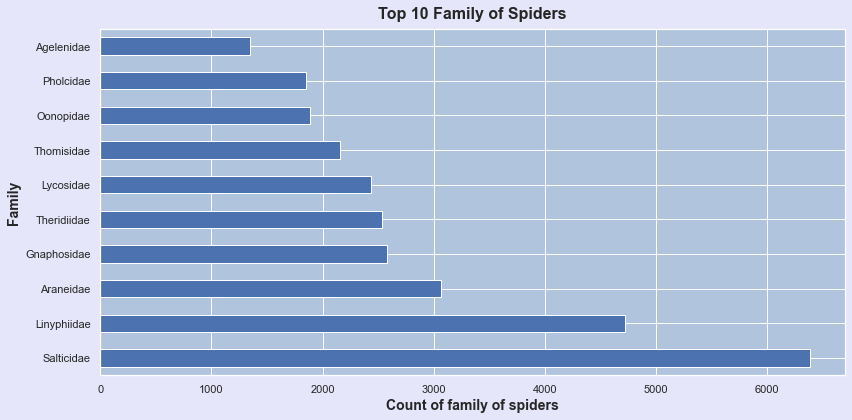

In [41]:
plt.figure(figsize=(12,6))
dfc['family'].value_counts()[:10].plot(kind='barh')
plt.title('Top 10 Family of Spiders', size=16)
plt.xlabel('Count of family of spiders', size=14)
plt.ylabel('Family', size=14)
plt.xticks(size=11)
plt.yticks(size=11)
plt.show()

In [42]:
dfc['genus'].nunique()

4233

In [43]:
n=10
dfc['genus'].value_counts()[:n].index.tolist()

['Theridion',
 'Araneus',
 'Pardosa',
 'Clubiona',
 'Zelotes',
 'Pholcus',
 'Tetragnatha',
 'Xysticus',
 'Dysdera',
 'Oxyopes']

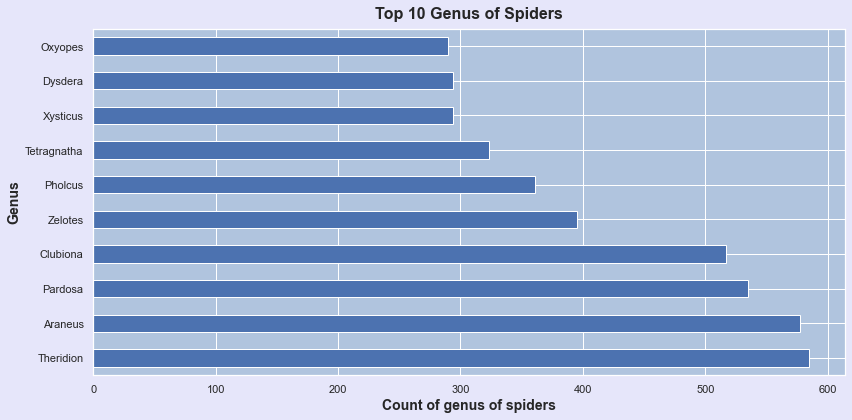

In [44]:
plt.figure(figsize=(12,6))
dfc['genus'].value_counts()[:10].plot(kind='barh')
plt.title('Top 10 Genus of Spiders', size=16)
plt.xlabel('Count of genus of spiders', size=14)
plt.ylabel('Genus', size=14)
plt.xticks(size=11)
plt.yticks(size=11)
plt.show()

In [45]:
dfc['species'].nunique()

27422

In [46]:
n=10
dfc['species'].value_counts()[:n].index.tolist()

['simoni',
 'gertschi',
 'longipes',
 'bicolor',
 'australis',
 'similis',
 'gracilis',
 'minuta',
 'pallida',
 'elegans']

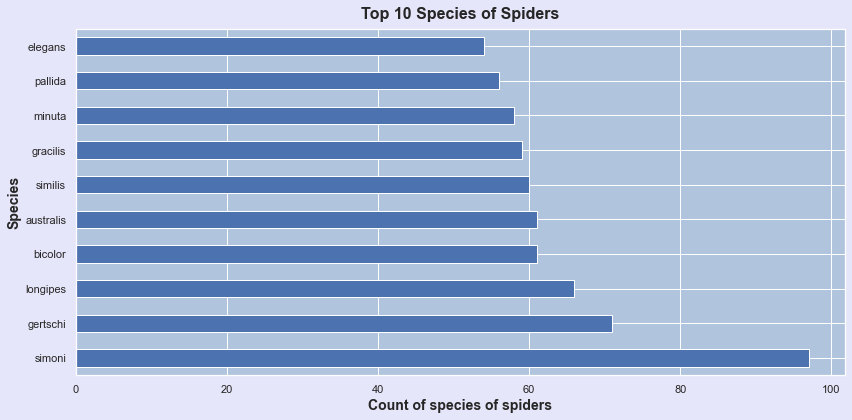

In [47]:
plt.figure(figsize=(12,6))
dfc['species'].value_counts()[:10].plot(kind='barh')
plt.title('Top 10 Species of Spiders', size=16)
plt.xlabel('Count of species of spiders', size=14)
plt.ylabel('Species', size=14)
plt.xticks(size=11)
plt.yticks(size=11)
plt.show()

## ..................................................................................................................................................

In [48]:
dfc.head()

,family,genus,species,year,parentheses,Founded 1,Founded 2,author 1,author 2
0,Actinopodidae,Actinopus,caraiba,1889,1,Venezuela,Venezuela,Simon,Simon
1,Actinopodidae,Actinopus,crassipes,1891,1,Brazil,Paraguay,Keyserling,Keyserling
2,Actinopodidae,Actinopus,cucutaensis,1941,0,Colombia,Venezuela,Mello-Leitão,Mello-Leitão
3,Actinopodidae,Actinopus,dubiomaculatus,1923,0,Brazil,Brazil,Mello-Leitão,Mello-Leitão
4,Actinopodidae,Actinopus,echinus,1949,0,Brazil,Brazil,Mello-Leitão,Mello-Leitão


## 2. What are the top 10 places where maximum number of spiders are found ?

In [49]:
n=10
dfc['Founded 1'].value_counts()[:n].index.tolist()

['China',
 'Brazil',
 'USA',
 'Mexico',
 'India',
 'South Africa',
 'Australia (Queensland)',
 'New Zealand',
 'Colombia',
 'Peru']

In [50]:
n=10
dfc['Founded 2'].value_counts()[:n].index.tolist()

['China',
 'Brazil',
 'USA',
 'South Africa',
 'Mexico',
 'India',
 'Australia (Queensland)',
 'New Zealand',
 'Australia (Western Australia)',
 'Japan']

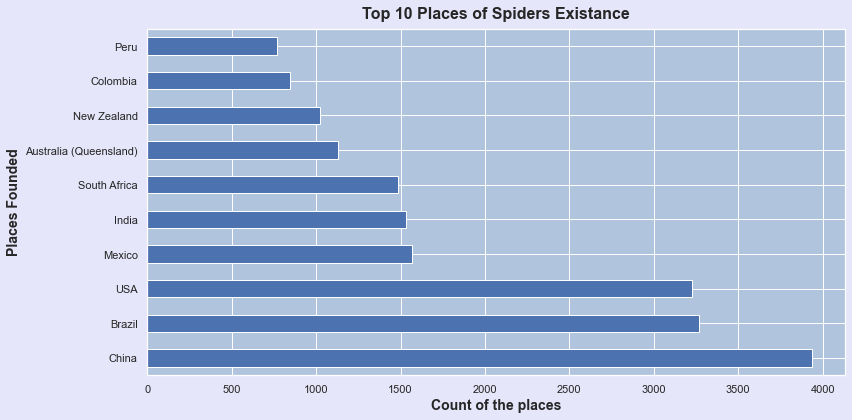

In [51]:
plt.figure(figsize=(12,6))
dfc['Founded 1'].value_counts()[:10].plot(kind='barh')
plt.title('Top 10 Places of Spiders Existance', size=16)
plt.xlabel('Count of the places', size=14)
plt.ylabel('Places Founded', size=14)
plt.xticks(size=11)
plt.yticks(size=11)
plt.show()

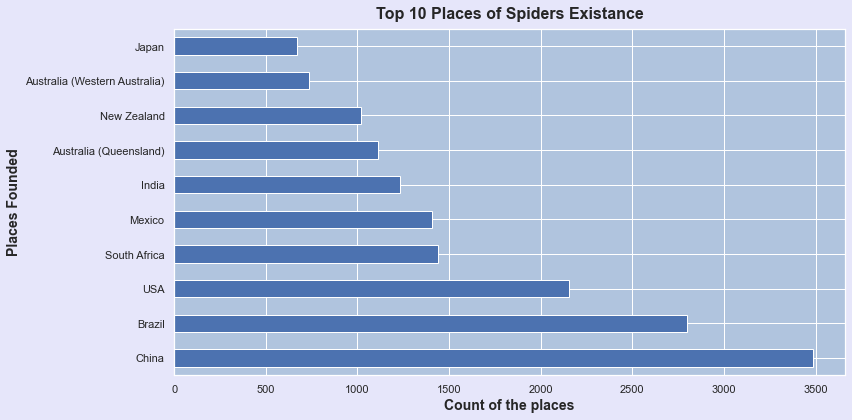

In [52]:
plt.figure(figsize=(12,6))
dfc['Founded 2'].value_counts()[:10].plot(kind='barh')
plt.title('Top 10 Places of Spiders Existance', size=16)
plt.xlabel('Count of the places', size=14)
plt.ylabel('Places Founded', size=14)
plt.xticks(size=11)
plt.yticks(size=11)
plt.show()

## ...........................................................................................................................................

## ...............................................................................................................................................

## 2. In which countries are the maximum number of Family, Genus and Species of spiders are found?

### For this we will take the top 5 approach instead of 10

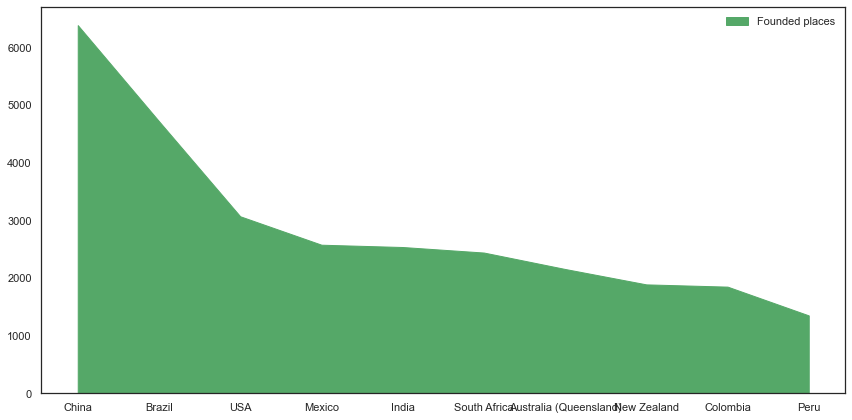

In [82]:
plt.figure(figsize=(12,6))
x1 = dfc['Founded 1'].value_counts()[:10].index.tolist()
y11 = [dfc['family'].value_counts()[:10]]

plt.stackplot(x1,y11, labels=['Founded places'], color='g')
plt.legend(loc='upper right')
plt.show()

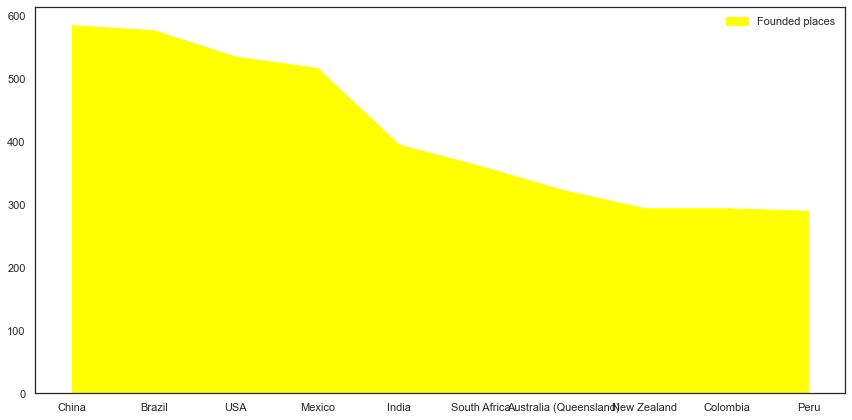

In [83]:
plt.figure(figsize=(12,6))
x2 = dfc['Founded 1'].value_counts()[:10].index.tolist()
y21 = [dfc['genus'].value_counts()[:10]]

plt.stackplot(x2,y21, labels=['Founded places'], color='yellow')
plt.legend(loc='upper right')
plt.show()

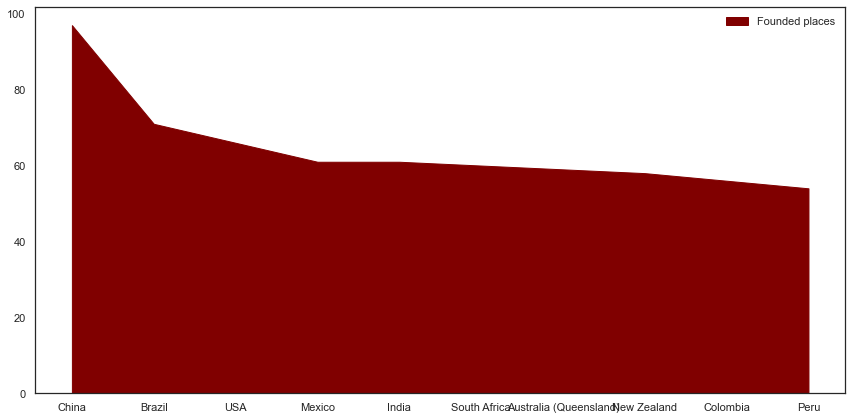

In [84]:
plt.figure(figsize=(12,6))
x3 = dfc['Founded 1'].value_counts()[:10].index.tolist()
y31 = [dfc['species'].value_counts()[:10]]

plt.stackplot(x3,y31, labels=['Founded places'], color='maroon')
plt.legend(loc='upper right')
plt.show()

## ......................................................................................................................................

## .............................................................................................................................

## 3. Which authors found the maximum of Which Family, Genus and Species of Spiders?

In [60]:
dfc.head()

,family,genus,species,year,parentheses,Founded 1,Founded 2,author 1,author 2
0,Actinopodidae,Actinopus,caraiba,1889,1,Venezuela,Venezuela,Simon,Simon
1,Actinopodidae,Actinopus,crassipes,1891,1,Brazil,Paraguay,Keyserling,Keyserling
2,Actinopodidae,Actinopus,cucutaensis,1941,0,Colombia,Venezuela,Mello-Leitão,Mello-Leitão
3,Actinopodidae,Actinopus,dubiomaculatus,1923,0,Brazil,Brazil,Mello-Leitão,Mello-Leitão
4,Actinopodidae,Actinopus,echinus,1949,0,Brazil,Brazil,Mello-Leitão,Mello-Leitão


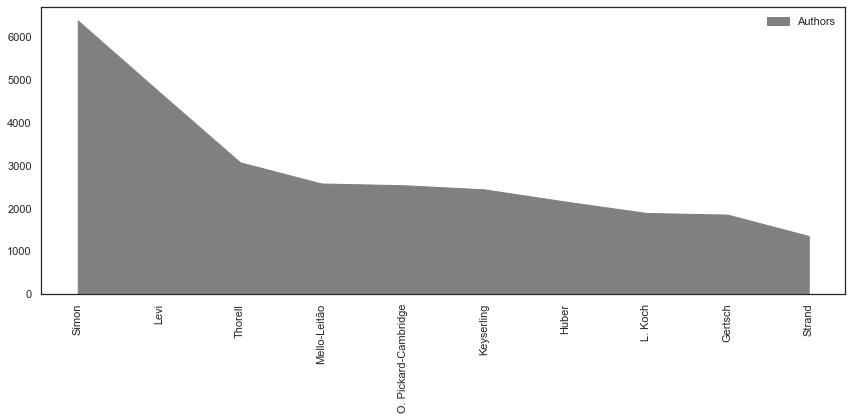

In [107]:
plt.figure(figsize=(12,6))
xx1 = dfc['author 1'].value_counts()[:10].index.tolist()
yy1 = [dfc['family'].value_counts()[:10]]

plt.stackplot(xx1,yy1, labels=['Authors'], color='gray')
plt.legend(loc='upper right')
plt.xticks(rotation=90)
plt.show()

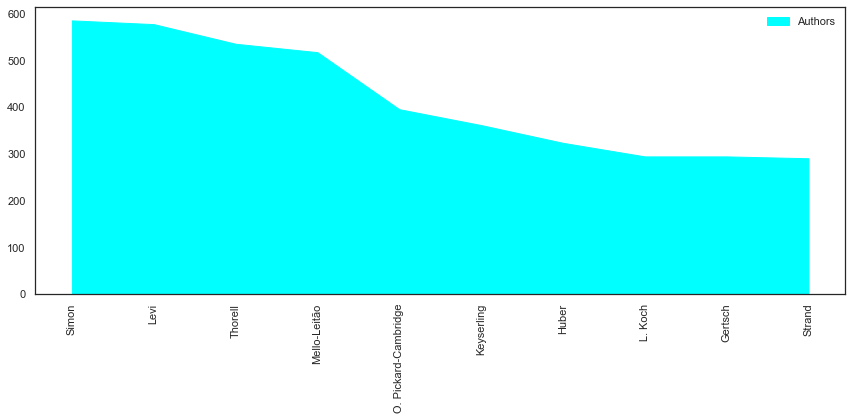

In [110]:
plt.figure(figsize=(12,6))
xx2 = dfc['author 1'].value_counts()[:10].index.tolist()
yy2 = [dfc['genus'].value_counts()[:10]]

plt.stackplot(xx2,yy2, labels=['Authors'], color='cyan')
plt.legend(loc='upper right')
plt.xticks(rotation=90)
plt.show()

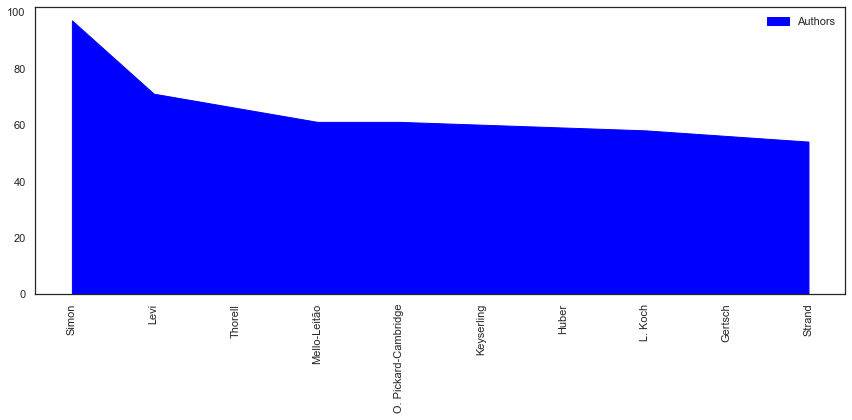

In [115]:
plt.figure(figsize=(12,6))
xx3 = dfc['author 1'].value_counts()[:10].index.tolist()
yy3 = [dfc['species'].value_counts()[:10]]

plt.stackplot(xx3,yy3, labels=['Authors'], color='blue')
plt.legend(loc='upper right')
plt.xticks(rotation=90)
plt.show()

## .................................................................................................................................................

## .................................................................................................................................................

## 4. Which are the rarest of Family, genus and species and where are they found?

In [167]:
famlow = dfc['family'].value_counts()[dfc['family'].value_counts() == dfc['family'].value_counts().min()].head(5)
genlow = dfc['genus'].value_counts()[dfc['genus'].value_counts() == dfc['genus'].value_counts().min()].head(5)
spelow = dfc['species'].value_counts()[dfc['species'].value_counts() == dfc['species'].value_counts().min()].head(5)

In [168]:
print(famlow)
print('-' * 40)
print(genlow)
print('-' * 40)
print(spelow)

Huttoniidae          1
Megahexuridae        1
Myrmecicultoridae    1
Trogloraptoridae     1
Name: family, dtype: int64
----------------------------------------
Ballagascar    1
Tekellatus     1
Viribestus     1
Iamarra        1
Timonoe        1
Name: genus, dtype: int64
----------------------------------------
backstromi      1
distichoides    1
pinda           1
pungitia        1
gympie          1
Name: species, dtype: int64


In [186]:
filter_list1 = ['Huttoniidae', 'Megahexuridae', 'Myrmecicultoridae', 'Trogloraptoridae']
dfc[dfc.family.isin(filter_list1)]

,family,genus,species,year,parentheses,Founded 1,Founded 2,author 1,author 2
12845,Huttoniidae,Huttonia,palpimanoides,1880,0,New Zealand,New Zealand,O. Pickard-Cambridge,O. Pickard-Cambridge
20595,Megahexuridae,Megahexura,fulva,1919,1,USA,USA,Chamberlin,Chamberlin
41602,Trogloraptoridae,Trogloraptor,marchingtoni,2012,0,USA,USA,Griswold,Audisio & Ledford
47651,Myrmecicultoridae,Myrmecicultor,chihuahuensis,2019,0,USA,Mexico,Ramírez,Grismado & Ubick


# .........................................................................................................................

In [189]:
filter_list2 = ['Ballagascar', 'Tekellatus', 'Viribestus', 'Iamarra', 'Timonoe']
dfc[dfc.genus.isin(filter_list2)]

,family,genus,species,year,parentheses,Founded 1,Founded 2,author 1,author 2
8003,Cyatholipidae,Tekellatus,lamingtoniensis,1978,0,Australia (Queensland),Australia (Queensland),Wunderlich,Wunderlich
32532,Salticidae,Viribestus,suyanensis,2012,0,Indonesia (New Guinea),Papua New Guinea,Zhang & Maddison,Zhang & Maddison
35955,Tetragnathidae,Timonoe,argenteozonata,1898,0,Myanmar,Myanmar,Thorell,Thorell
43160,Salticidae,Ballagascar,insularis,1885,1,Madagascar,Madagascar,G. W. Peckham & E. G. Peckham,G. W. Peckham & E. G. Peckham
48081,Tetragnathidae,Iamarra,multitheca,2020,0,Australia (Queensland),Australia (Queensland),Álvarez-Padilla,Kallal & Hormiga


In [190]:
filter_list3 = ['backstromi', 'distichoides', 'pinda', 'pungitia', 'gympie']
dfc[dfc.species.isin(filter_list3)]

,family,genus,species,year,parentheses,Founded 1,Founded 2,author 1,author 2
10176,Gallieniellidae,Meedo,gympie,2002,0,Australia (Queensland,New South Wales),Platnick,Platnick
13533,Leptonetidae,Leptonetela,pungitia,2011,0,Vietnam,Vietnam,Wang & Li,Wang & Li
14150,Linyphiidae,Bolyphantes,distichoides,2000,0,Russia (South Siberia),Russia (South Siberia),Tanasevitch,Tanasevitch
33502,Sparassidae,Caayguara,pinda,2010,0,Brazil,Brazil,Rheims,Rheims
37083,Theridiidae,Chrysso,backstromi,1924,1,Chile (Juan Fernandez Is.),Chile (Juan Fernandez Is.),Berland,Berland


## ..............................................................................................................................................

## ..............................................................................................................................................

## ..............................................................................................................................................

In [191]:
dfc.to_excel('spiders_dataset.xlsx')